# **Foul Language Detection**
## IT - 608 : Machine Learning Project

**Group Members:**

Pratik Patil - 202118023

Bhavya Chandrasala - 202118028

Jeffrey James - 202118031

Tanya Jagyasi - 202118039

## Importing Libraries and Dataset:

In [ ]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.calibration import CalibratedClassifierCV
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('stopwords')
import warnings
from warnings import simplefilter
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# # Mounting Google Drive:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing the dataset:
#data = pd.read_csv('/content/drive/MyDrive/ML Project/Foul_Dataset_1_CSV.csv')
#data = pd.read_csv('/content/drive/MyDrive/Dataset/Foul_Dataset.csv')
data = pd.read_csv('/content/Foul_Dataset_1_CSV.csv')

In [ ]:
# Printing head of the dataset:
data.head()

,Unnamed: 0,Count,Foul_Lang,Not_Foul,Class,Tweets
0,0,3,0,3,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**For 'Class' variable:**

0 : Foul Laanguage (hate speech/offensive language)

1 : Not Foul language
 

## Preprocessing:

In [ ]:
# Getting summary statistics of the data for each column:
data.describe()

,Unnamed: 0,Count,Foul_Lang,Not_Foul,Class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,2.694226,0.549247,0.167978
std,7299.553863,0.883060,1.376487,1.113299,0.373854
min,0.000000,3.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,3.000000,0.000000,0.000000
50%,12703.000000,3.000000,3.000000,0.000000,0.000000
75%,18995.500000,3.000000,3.000000,0.000000,0.000000
max,25296.000000,9.000000,9.000000,9.000000,1.000000


In [ ]:
# Displaying all information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24783 non-null  int64 
 1   Count       24783 non-null  int64 
 2   Foul_Lang   24783 non-null  int64 
 3   Not_Foul    24783 non-null  int64 
 4   Class       24783 non-null  int64 
 5   Tweets      24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
# Displaying the datatypes
data.dtypes

Unnamed: 0     int64
Count          int64
Foul_Lang      int64
Not_Foul       int64
Class          int64
Tweets        object
dtype: object

In [ ]:
# To get the total number of rows and columns
nRow, nCol = data.shape
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 24783 rows and 6 columns


In [ ]:
# To check if there are any null values
data.isna().sum()

Unnamed: 0    0
Count         0
Foul_Lang     0
Not_Foul      0
Class         0
Tweets        0
dtype: int64

### Data Cleaning:

In [ ]:
# Getting features of the dataset:
# Dropping unwanted column:
data = data.drop(data.columns[0],axis=1)
data

,Count,Foul_Lang,Not_Foul,Class,Tweets
0,3,0,3,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...
24778,3,2,1,0,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,1,2,1,"you've gone and broke the wrong heart baby, an..."
24780,3,3,0,0,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,6,0,0,youu got wild bitches tellin you lies


In [ ]:
# To store tweets in a variable
tweet = data.Tweets
print(tweet)

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: Tweets, Length: 24783, dtype: object


In [ ]:
# Cleaning Text (Retweets, Tags, Punctuation, etc.)
# Creating new dataframe and new features:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()

    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])

    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet

    return tweets_p

processed_tweets = preprocess(tweet)

data['processed_tweets'] = processed_tweets
print(data[["Tweets","processed_tweets"]].head(10))

                                              Tweets  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

In [ ]:
# Creating a target variable
target = data['Class']
target

0        1
1        0
2        0
3        0
4        0
        ..
24778    0
24779    1
24780    0
24781    0
24782    1
Name: Class, Length: 24783, dtype: int64

In [ ]:
# Unique elements in the array:
target.unique()

array([1, 0])

In [ ]:
# Information about the columns in the dataset:
data_features = data
data_features.columns

Index(['Count', 'Foul_Lang', 'Not_Foul', 'Class', 'Tweets',
       'processed_tweets'],
      dtype='object')

### Data Visualization:

In [ ]:
# Total counts of unique elements
data['Class'].value_counts()

0    20620
1     4163
Name: Class, dtype: int64

In [ ]:
# Storing the counts in variables
class_counts = np.array(data['Class'].value_counts())
count_t = nRow
count_0 = class_counts[0]
count_1 = class_counts[1]

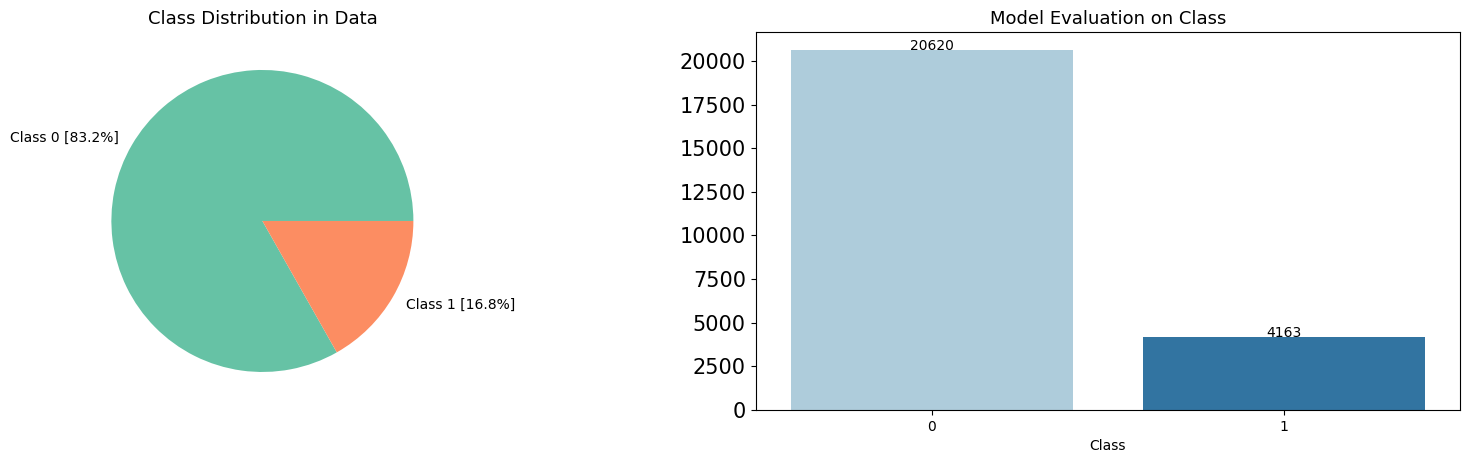

In [ ]:
# Calculating the percentage of values in each class:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

class_0_percent = percentage(count_0,count_t)
class_1_percent = percentage(count_1,count_t)

class_0_perc = format(class_0_percent, '.1f')      # Here .1f is 1 digit of precision after the floating point.
class_1_perc = format(class_1_percent, '.1f')
labels_1 = ['Class 0 ['+str(class_0_perc)+'%]' , 'Class 1 ['+str(class_1_perc)+'%]']

fig,ax = plt.subplots(ncols = 2, figsize = (20,5) , dpi = 100)

colors = ['#66c2a5', '#fc8d62' , '#8da0cb' ,'#e78ac3' , '#a6d854']
data['Class'].value_counts().plot(kind = 'pie',ax = ax[0], labels = labels_1 , colors = colors)
sns.countplot(x = 'Class' , data = data, palette = 'Paired')

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y', labelsize=15)
    plt.text(i, class_counts[i], class_counts[i], ha = 'center')

ax[0].set_title('Class Distribution in Data', fontsize=13)
ax[1].set_title('Model Evaluation on Class', fontsize = 13)

plt.show()

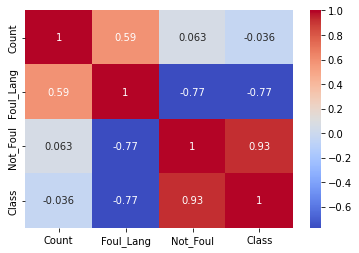

In [ ]:
# Correlation Matrix visualization
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

### Visualizing using Word Cloud:

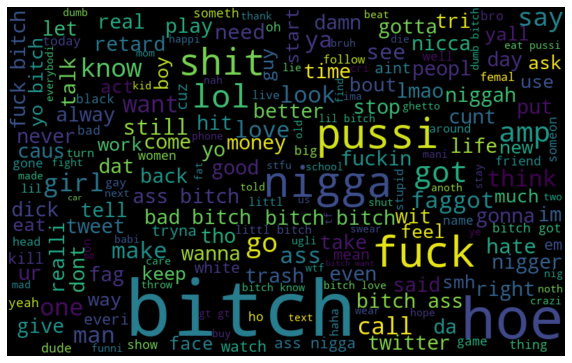

In [ ]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in data['processed_tweets'][data['Class'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("wordcloud_1.png")
plt.show()

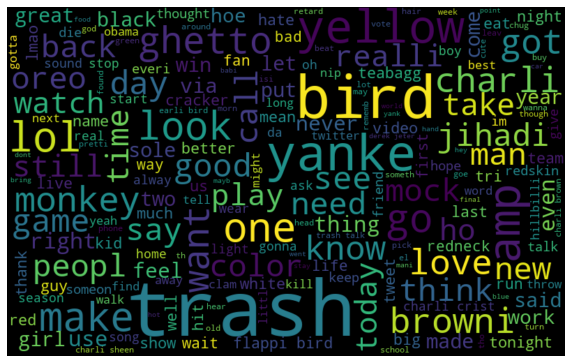

In [ ]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in data['processed_tweets'][data['Class'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("wordcloud_2.png")
plt.show()

### Converting data to TF-IDF:

In [ ]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['processed_tweets'] )
tfidf

<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

### Setting up Test and Train variables:

In [ ]:
# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value is generated 
# and the train and test datasets would have different values each time.
X = tfidf
y = data['Class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
print(X_train_tfidf.shape)
print(y_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_test_tfidf.shape)

(19826, 6441)
(19826,)
(4957, 6441)
(4957,)


In [ ]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train_tfidf, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [16498  3328]]


In [ ]:
#Test Data
unique_elements, counts_elements = np.unique(y_test_tfidf, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [4122  835]]


As our data is bias/skewed we use oversampling to get balance between 2 classes.

# Re - Sampling  

In [ ]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train_tfidf, y_train_tfidf)

In [ ]:
print(X_over.shape)
print(y_over.shape)

(32996, 6441)
(32996,)


In [ ]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [16498 16498]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, test_size=0.2)

## Logistic Regression:

In [ ]:
from sklearn.metrics import r2_score
# Create a Logistic Regression Model:
# Train the model using the training sets:
lr_model = LogisticRegression().fit(X_over, y_over)

# Predict the response for test dataset
y_pred_lr = lr_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
report_lr = classification_report(y_test, y_pred_lr)
print('Logistic Regeression:\n Report:\n', report_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Score:", acc_lr)
prec_lr = precision_score(y_test, y_pred_lr)
print("Precision:", prec_lr)
rec_lr = recall_score(y_test, y_pred_lr)
print("Recall:", rec_lr)

Logistic Regeression:
 Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3348
           1       0.95      0.99      0.97      3252

    accuracy                           0.97      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.97      0.97      0.97      6600

Accuracy Score: 0.9660606060606061
Precision: 0.9466076696165192
Recall: 0.9867773677736777


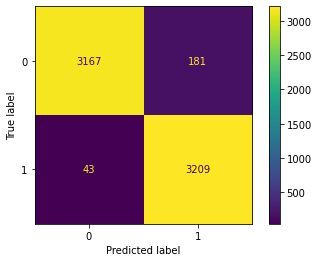

In [ ]:
# Plotting Confusion Matrix:
plot_confusion_matrix(lr_model, X_test, y_test)
plt.savefig("Logistic_Confusion_MAtrix.png")
plt.show()

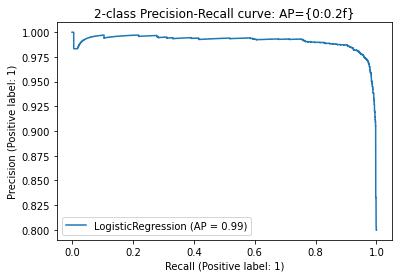

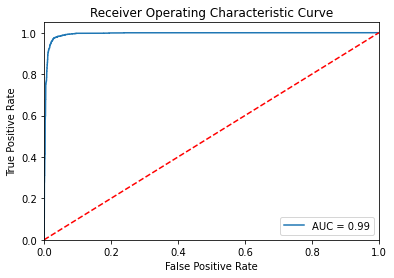

In [ ]:
# Plotting the curve using the function plot_precision_recall_curve
disp = plot_precision_recall_curve(lr_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}')

lr_prob = lr_model.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  lr_prob)
lr_auc = metrics.roc_auc_score(y_test, lr_prob)

#create ROC and Recall curves:
plt.figure()
plt.plot(fpr_lr,tpr_lr,label="AUC = %0.2f" % lr_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=4)
plt.show()

## Decision Tree:

In [ ]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_fit = dt_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt = dt_fit.predict(X_test)

# Model Accuracy, how often is the classifier correct?
report_dt = classification_report(y_test, y_pred_dt)
print('Decision Tree:\n Report:\n', report_dt, sep='\n')
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Score:", acc_dt)
prec_dt = precision_score(y_test, y_pred_dt)
print("Precision:", prec_dt)
rec_dt = recall_score(y_test, y_pred_dt)
print("Recall:", rec_dt)

Decision Tree:
 Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3348
           1       0.96      1.00      0.98      3252

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600

Accuracy Score: 0.9766666666666667
Precision: 0.9561248527679623
Recall: 0.9984624846248462


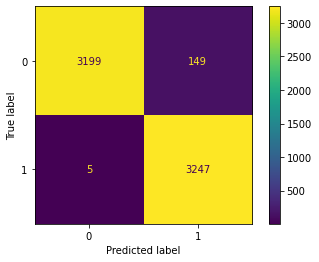

In [ ]:
# Plotting Confusion Matrix:
plot_confusion_matrix(dt_model, X_test, y_test)
plt.savefig("Decision_Confusion_MAtrix.png")
plt.show()

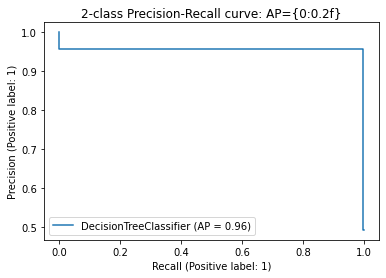

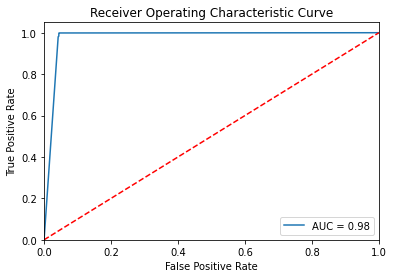

In [ ]:
# Plotting the curve using the function
disp = plot_precision_recall_curve(dt_fit, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}')

dt_prob = dt_fit.predict_proba(X_test)[::,1]
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  dt_prob)
dt_auc = metrics.roc_auc_score(y_test, dt_prob)

#create ROC and Recall curves:
plt.figure()
plt.plot(fpr_dt,tpr_dt,label="AUC = %0.2f" % dt_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=4)
plt.show()

## Random Forest:

In [ ]:
# Create a Gaussian Classifier
rf_model = RandomForestClassifier()

# Train the model using the training sets y_pred=clf.predict(X_test)
rf_fit = rf_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rf = rf_fit.predict(X_test)

# Model Accuracy, how often is the classifier correct?
report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest:\n Report:\n', report_rf, sep='\n')
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", acc_rf)
prec_rf = precision_score(y_test, y_pred_rf)
print("Precision:", prec_rf)
rec_rf = recall_score(y_test, y_pred_rf)
print("Recall:", rec_rf)

Random Forest:
 Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      3348
           1       0.95      1.00      0.98      3252

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600

Accuracy Score: 0.9754545454545455
Precision: 0.9530791788856305
Recall: 0.9993849938499385


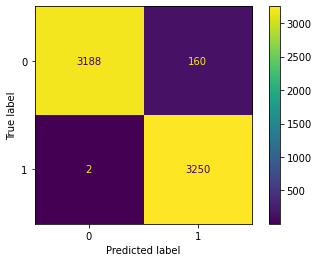

In [ ]:
# Plotting Confusion Matrix:
plot_confusion_matrix(rf_model, X_test, y_test)
plt.savefig("RandomForest_Confusion_MAtrix.png")
plt.show()

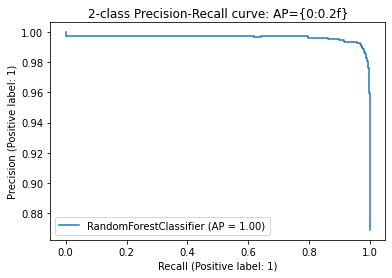

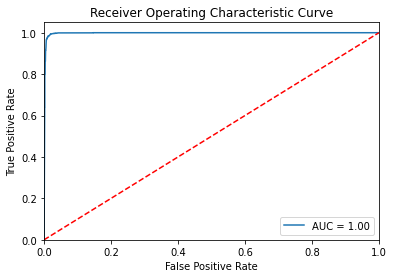

In [ ]:
# Plotting the curve using the function
disp = plot_precision_recall_curve(rf_fit, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}')

rf_prob = rf_fit.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  rf_prob)
rf_auc = metrics.roc_auc_score(y_test, rf_prob)

#create ROC and Recall curves:
plt.figure()
plt.plot(fpr_rf,tpr_rf,label="AUC = %0.2f" % rf_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=4)
plt.show()

## Suport Vector Machine:

In [ ]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel
svm_model = CalibratedClassifierCV(svm_model)

# Train the model using the training sets
svm_fit = svm_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm_fit.predict(X_test)

# Model Accuracy: how often is the classifier correct?
report_svm = classification_report(y_test, y_pred)
print('Support Vector Machine:\n Report:\n', report_svm, sep='\n')
acc_svm = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_svm)
prec_svm = precision_score(y_test, y_pred)
print("Precision:", prec_svm)
rec_svm = recall_score(y_test, y_pred)
print("Recall:", rec_svm)

Support Vector Machine:
 Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3348
           1       0.95      0.98      0.97      3252

    accuracy                           0.97      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.97      0.97      0.97      6600

Accuracy Score: 0.9675757575757575
Precision: 0.9523525908278737
Recall: 0.9833948339483395


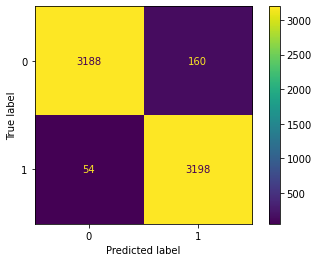

In [ ]:
# Plotting Confusion Matrix:
plot_confusion_matrix(svm_model, X_test, y_test)
plt.savefig("SVM_Confusion_MAtrix.png")
plt.show()

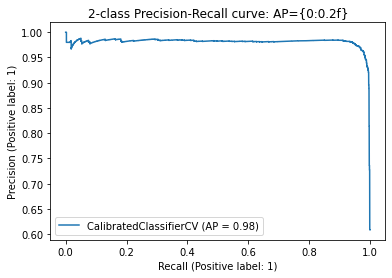

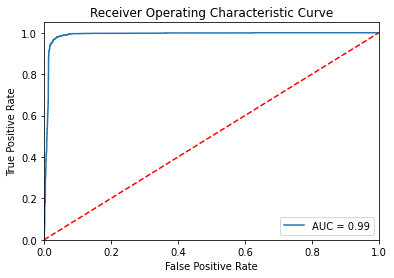

In [ ]:
# Plotting the curve using the function
disp = plot_precision_recall_curve(svm_fit, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}')

svm_prob = svm_fit.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  svm_prob)
svm_auc = metrics.roc_auc_score(y_test, svm_prob)

#create ROC and Recall curves:
plt.figure()
plt.plot(fpr_svm,tpr_svm,label="AUC = %0.2f" % svm_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=4)
plt.show()

## Comparison of Models:

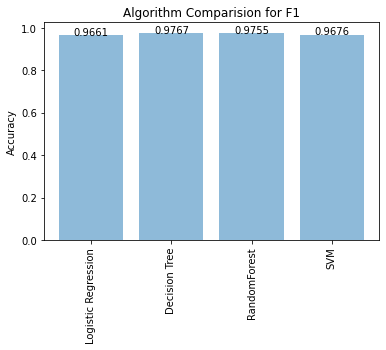

<Figure size 720x360 with 0 Axes>

In [ ]:
# Plotting all the Accuracy scores of trained models:
objects = ('Logistic Regression', 'Decision Tree',  'RandomForest', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc_lr, acc_dt, acc_rf, acc_svm]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')

for i in range(len(y_pos)):
  plt.text(i, performance[i], performance[i].round(4), ha = 'center')
plt.figure(figsize = (10, 5))
plt.show()

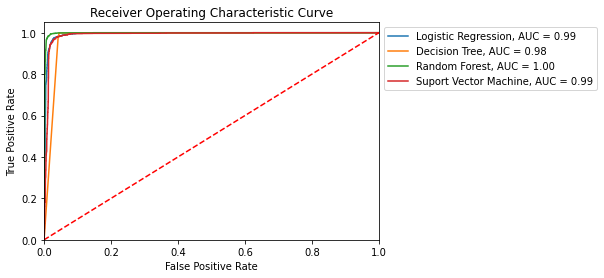

<Figure size 720x360 with 0 Axes>

In [ ]:
#set up plotting area
plt.figure(0).clf()

# Logistic Regression:
plt.plot(fpr_lr,tpr_lr,label="Logistic Regression, AUC = %0.2f" % lr_auc)

# Decision Tree:
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, AUC = %0.2f" % dt_auc)

# Random Forest:
plt.plot(fpr_rf,tpr_rf,label="Random Forest, AUC = %0.2f" % rf_auc)

# Suport Vector Machine:
plt.plot(fpr_svm,tpr_svm,label="Suport Vector Machine, AUC = %0.2f" % svm_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')

# Adding legend:
plt.legend(bbox_to_anchor = (1,1), loc = 2)

plt.figure(figsize = (10, 5))
plt.savefig("ROC_All.png")
plt.show()

# Conclusion

\begin{array}{|l|r|r|r|}
\hline \text { Model } & \text { Accuracy } & \text { Precision } & {\text { Recall }} \\
\hline \text { Logistic Regression } & 0.9660 & 0.9466 & 0.9867 \\
\hline \text { Decision Tree } & 0.9766 & 0.9561 & 0.9984 \\
\hline \text { Random Forest } & 0.9754 & 0.9530 & 0.9993 \\
\hline \text { Support Vector Machine } & 0.9675 & 0.9523 & 0.9833 \\
\hline
\end{array}


From above table and additional learning we can say that classification done by Decision Tree is more accurate and precise over other models.